# STA4724 Final Project
## Team 6: Andres Machado, Jackson Smalls, Sarah Taha, and Thomas Tibbets

### EDA (Exploratory Data Analysis) Notebook 

---

### Importing the libraries, data and initial inspections

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the dataset
raw_data = pd.read_csv("online_shoppers_intention.csv")

# Preview the dataset
raw_data.info()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


The data imported correctly and additionally we observe no null/missing values as expected. Let us now check for duplicate rows:

In [3]:
# Counting and printing the duplicate rows
duplicated_rows_count = raw_data.duplicated().sum()
print(f"Total number of duplicate rows: {duplicated_rows_count}")
print(f"Percentage of rows that are duplicates: {(duplicated_rows_count / len(raw_data)) * 100:.2f}%")

Total number of duplicate rows: 125
Percentage of rows that are duplicates: 1.01%


1.01% of rows are duplicates which is quite small. For our EDA purposes, we will keep them in, but when we go to fit models we will remove them prior to train and test split.

Before we progress any further, the columns `OperatingSystems`, `Browser`, `Region`, and `TrafficType` are categorical features being recognized as data type `int64`. For EDA purposes, we need to make them `category` type:

In [4]:
# Converting certain numerical columns to categorical 
num_to_cat_cols = ["OperatingSystems", "Browser", "Region", "TrafficType"]
raw_data[num_to_cat_cols] = raw_data[num_to_cat_cols].astype("category")

# Verifying
raw_data["OperatingSystems"].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8], ordered=False, categories_dtype=int64)

Next, we will generate the summary statistics for numerical features of the dataset:

In [5]:
# Summary stats
raw_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Looks pretty standard and matches up exactly what the researchers have from which we pulled this dataset from. There are some extreme values for the max but this we will take a closer look at through visualizations.

---

### **1D Data Visualizations**

*For this section, we are going to explore the variables a little more closely through visualizations.*

#### **Target (Revenue) Proportions**

First, let's see the distribution of the target variable by using a count plot:

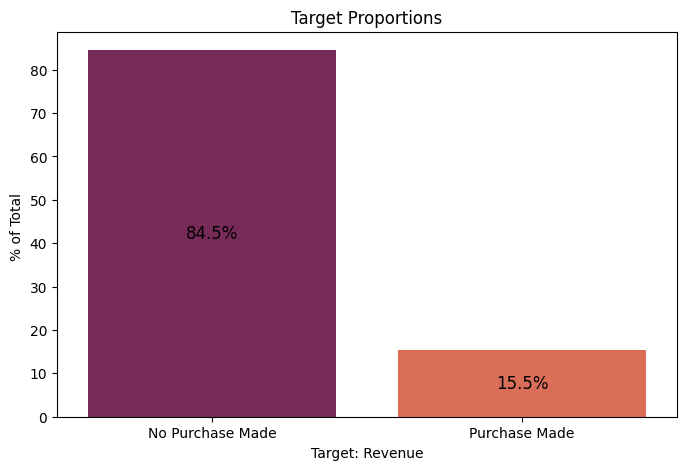

In [6]:
# Separating the target and renaming the true and false for clarity
target = raw_data["Revenue"]
target = target.replace({True: "Purchase Made", False: "No Purchase Made"})

# Countplot
plt.figure(figsize = (8,5))
ax = sns.countplot(x = target, hue = target, palette = "rocket", stat = "percent") 
for container in ax.containers: # Adding percentage values to the count plot
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=12, padding=0)
plt.title("Target Proportions")
plt.ylabel("% of Total ")
plt.xlabel("Target: Revenue")
plt.show()

We have more non-purchases than actual purchases. When we sample the data, it is critical that we take this into account.

Before we explore the variables, let's make separate data frames for the numerical and categorical features.

In [7]:
# Splitting of the raw data frame into cat and num dfs
cat_df = raw_data.select_dtypes(include=["object", "bool", "category"])
num_df = raw_data.select_dtypes(include=["int64", "float64"])

# Removing the Target variable (Revenue) out of the cat df
cat_df = cat_df.drop(columns = ["Revenue"])

# Verifying
# print(cat_df.head())
# print()
# print(num_df.head())

#### **Numerical Variables**

##### Histogram for each Numerical Variable

Firstly, let's take a look at the distribution for all the variables. We have a suspicion that everything will be right-skewed just based on the nature of the dataset. However, let's create some histograms to truly showcase to us what the distributions look like.

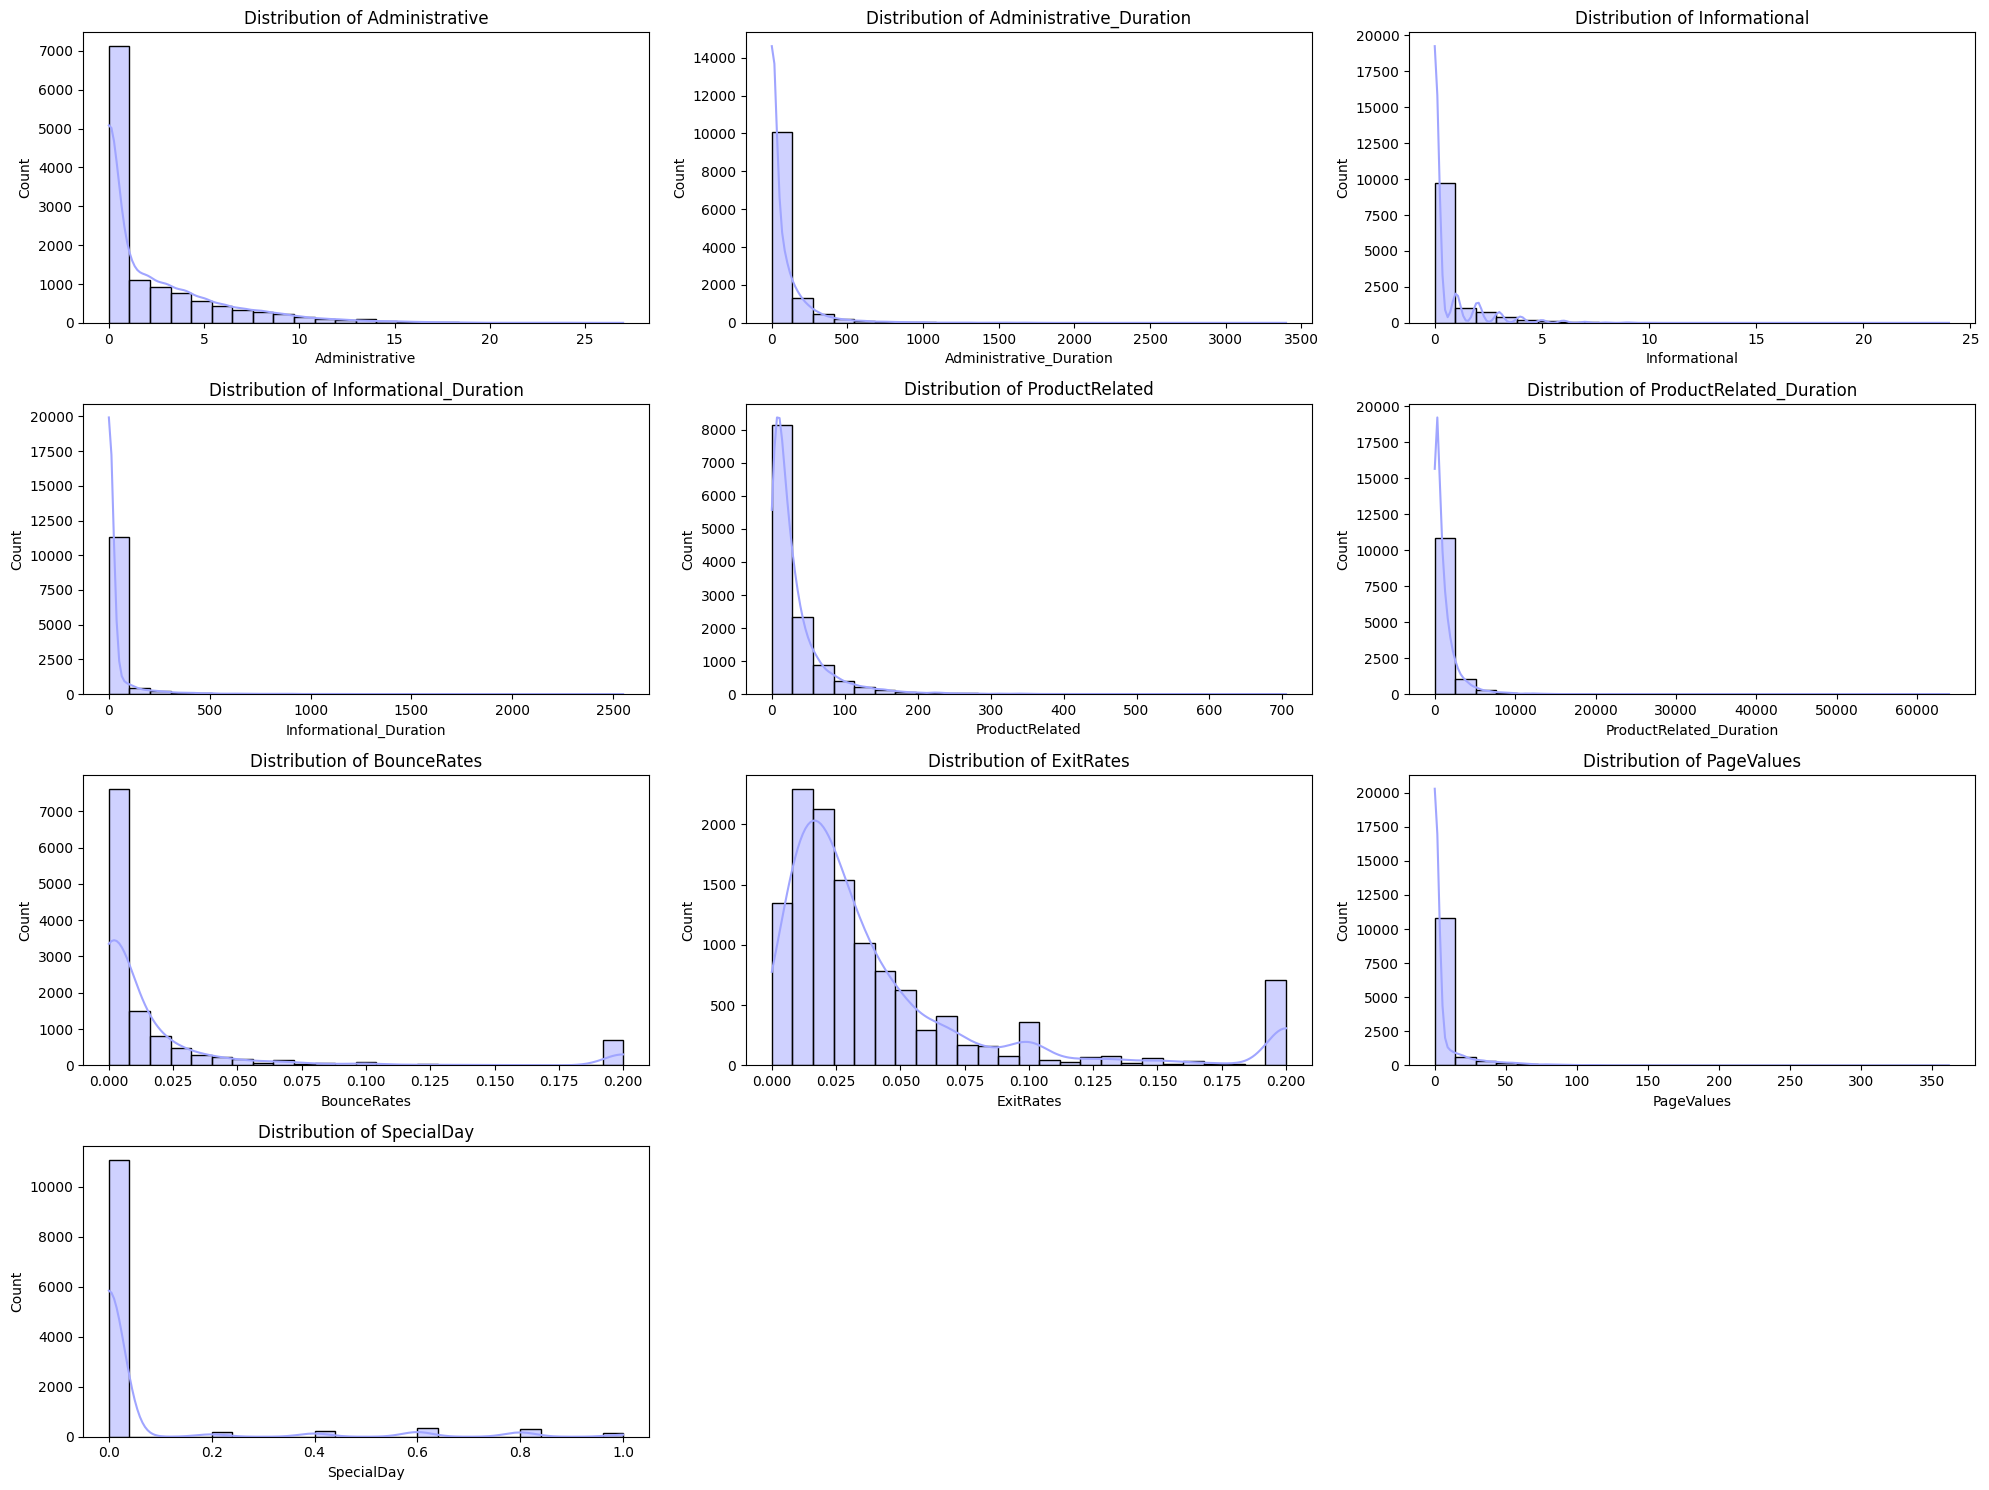

In [8]:
plt.figure(figsize = (20, 15)) # Make larger or smaller as needed
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(4,3,i) # Subplot (nrows, ncols, location in matrix)
    sns.histplot(num_df[col], kde = True, bins = 25, color = "#A0A5FF")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

As expected, they are quite heavily skewed to the right. To get a better grasp on the outliers, we can take a look at the box plots for these features:

##### Box Plot for each Numerical Variable

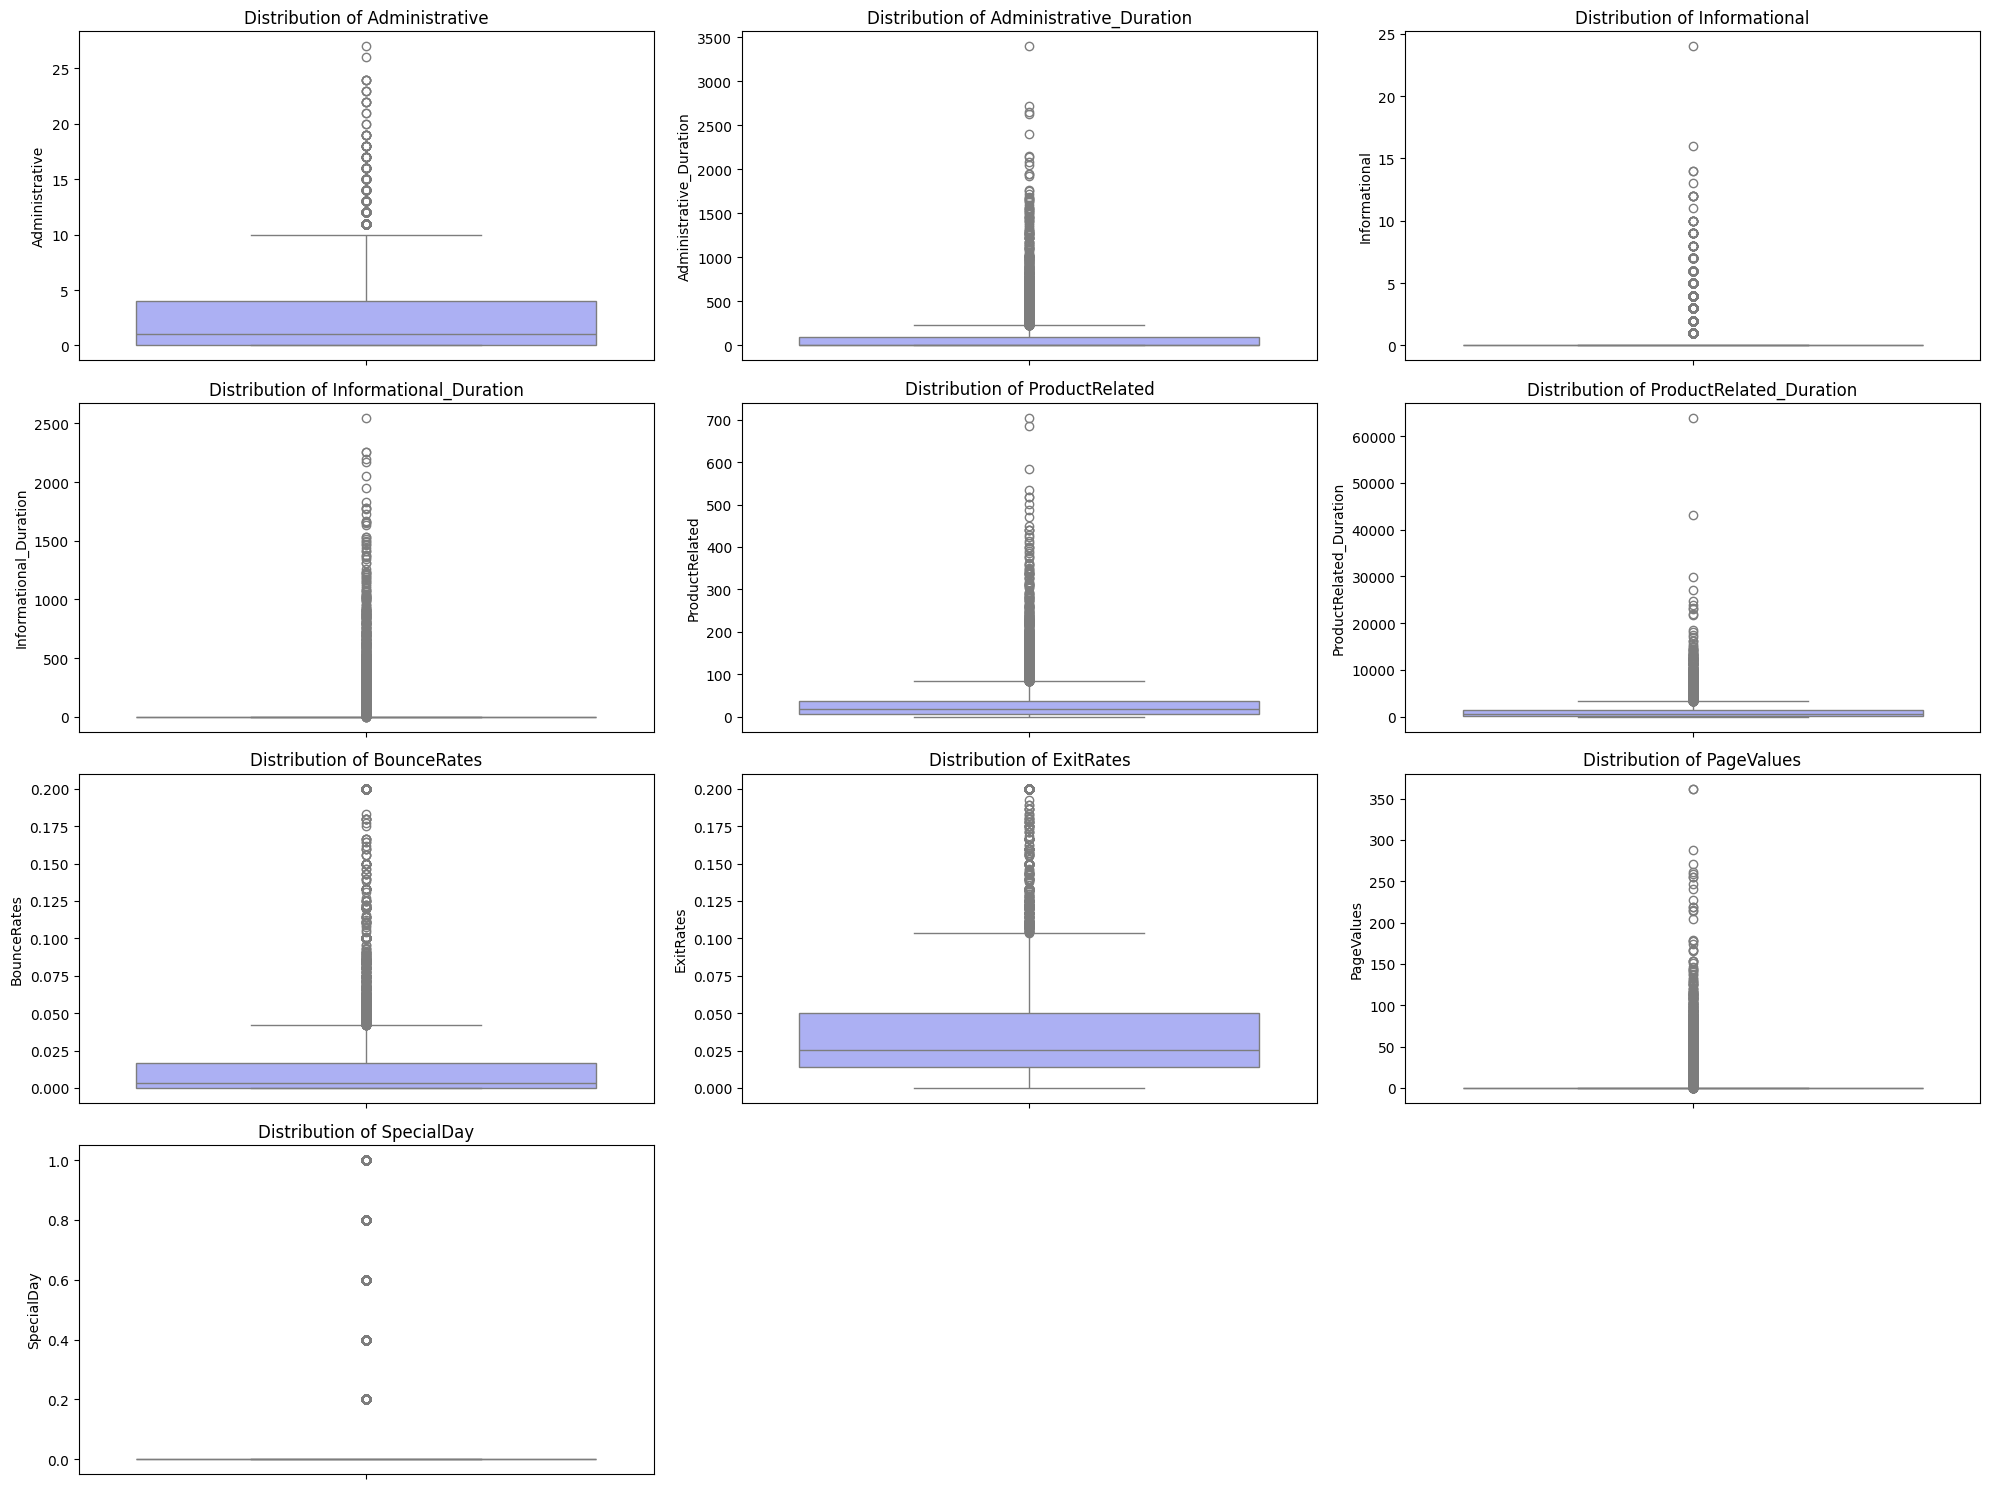

In [9]:
plt.figure(figsize = (20, 15)) # Make larger or smaller as needed
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(4,3,i) # Subplot (nrows, ncols, location in matrix)
    sns.boxplot(y = num_df[col], color = "#A0A5FF")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

As we can see, we further show the right-skew in the data along with the countless outliers in some of the variables. We must be mindful of how we handle these abnormalities when picking the right model.

##### Box Plots for each Numerical Feature against Target

Now, let's see how the distributions of these variables differ based on whether a purchase happened (Revenue = True) or didn't (Revenue = False).

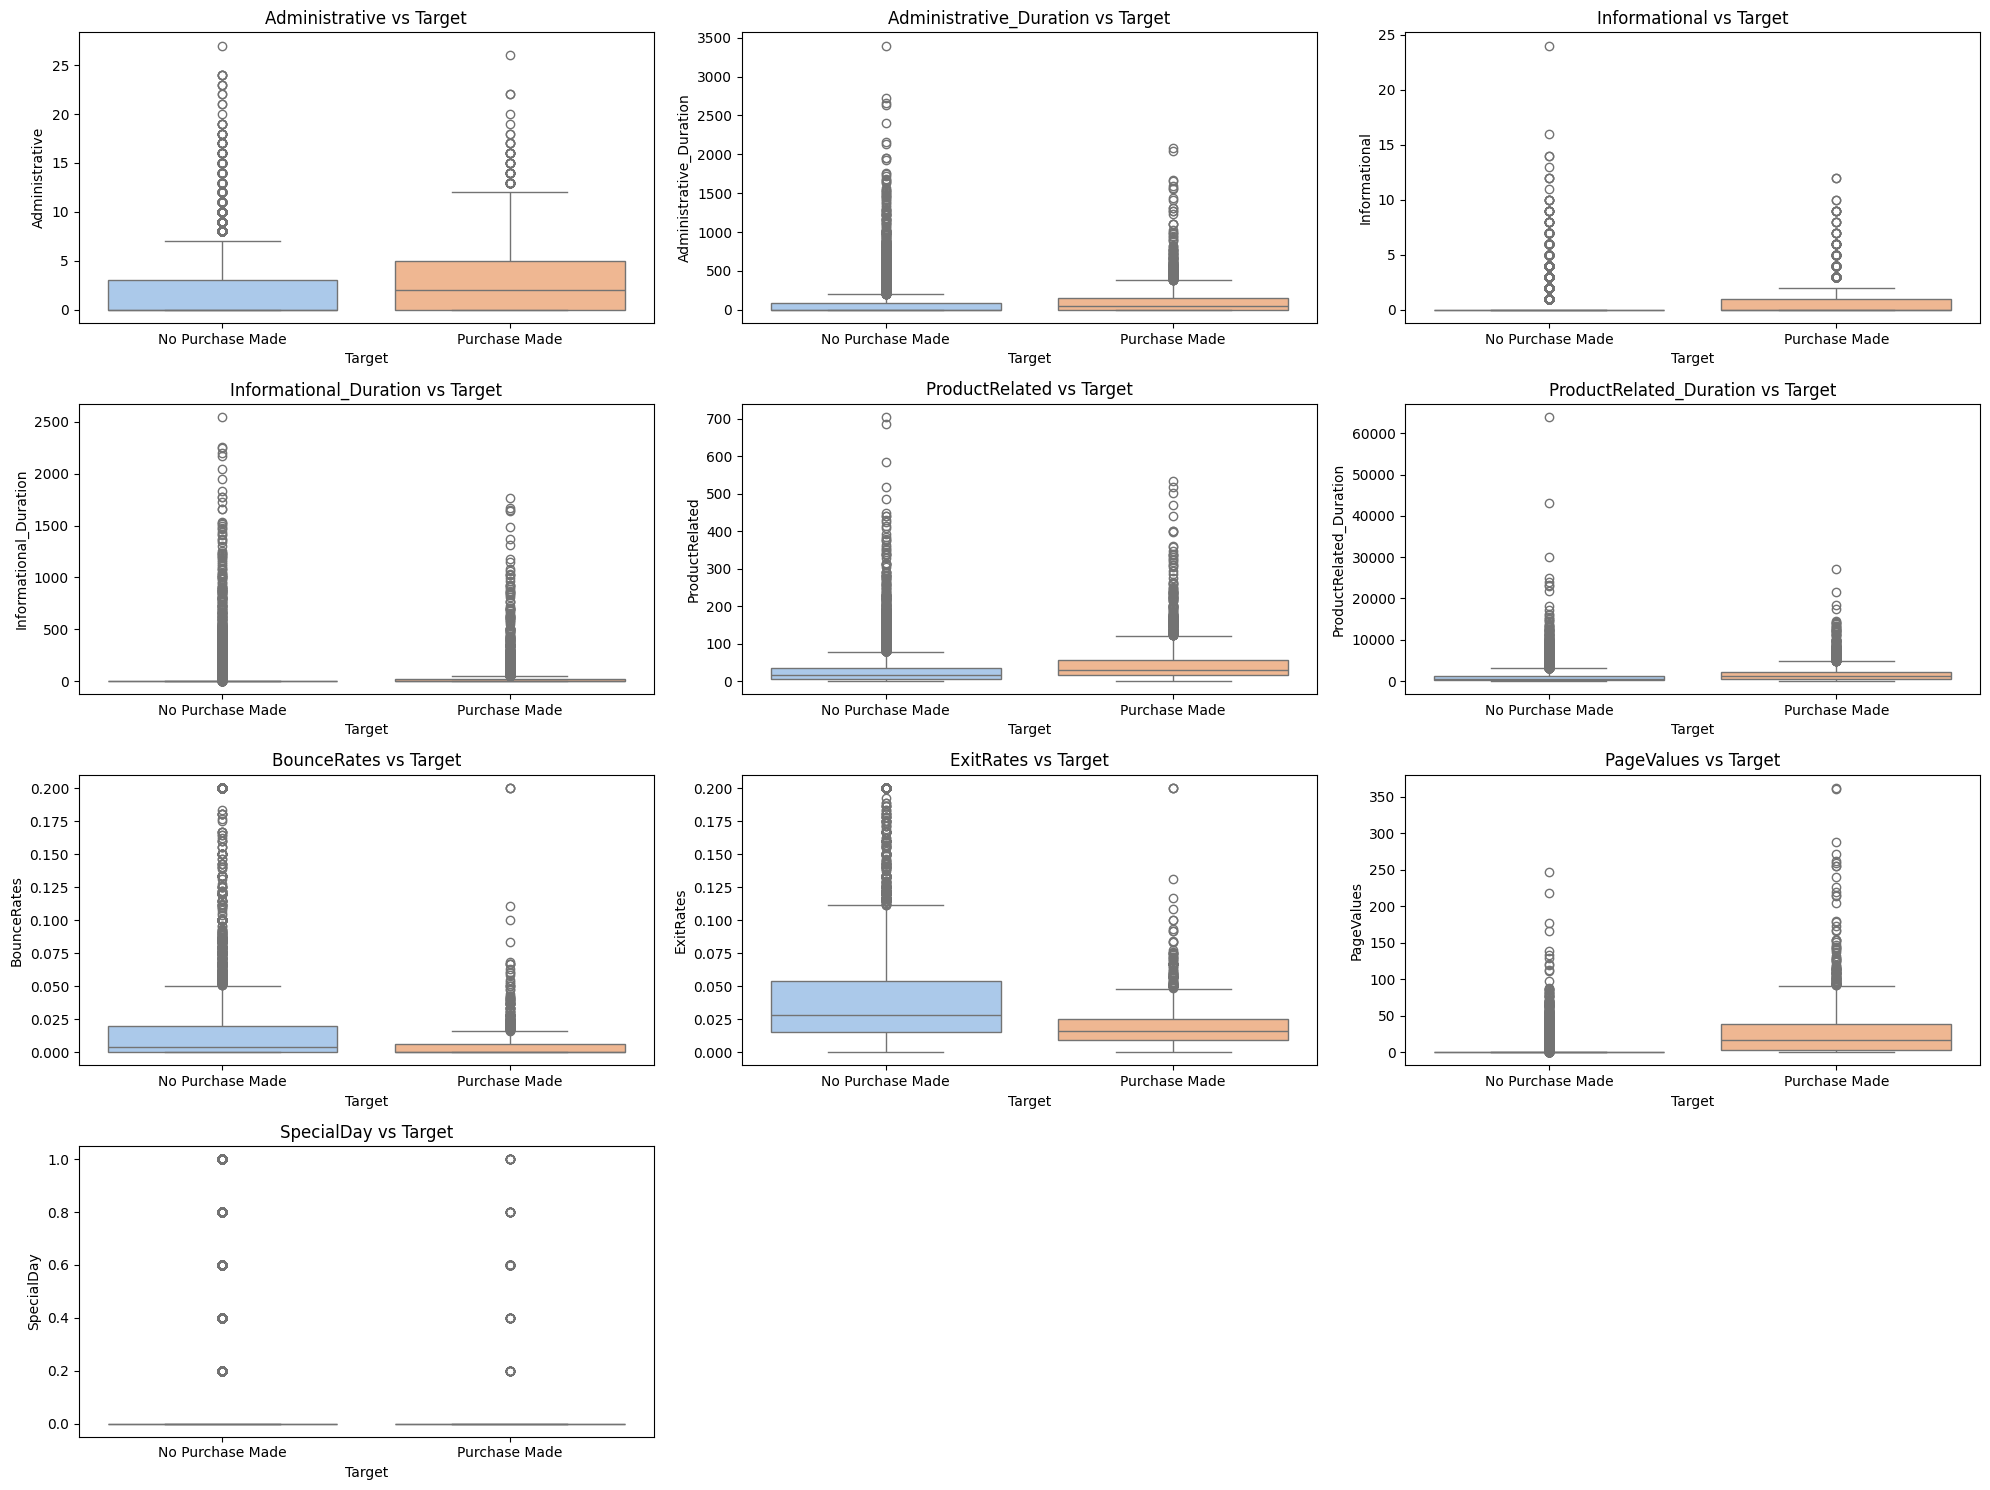

In [10]:
plt.figure(figsize = (20, 15)) # Make larger or smaller as needed
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(4,3,i) # Subplot (nrows, ncols, location in matrix)
    sns.boxplot(x = target, y = num_df[col], hue = target, palette = "pastel")
    plt.title(f"{col} vs Target")
    plt.xlabel("Target")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

#### **Categorical Variables**

##### Count Plots for each Categorical Variable

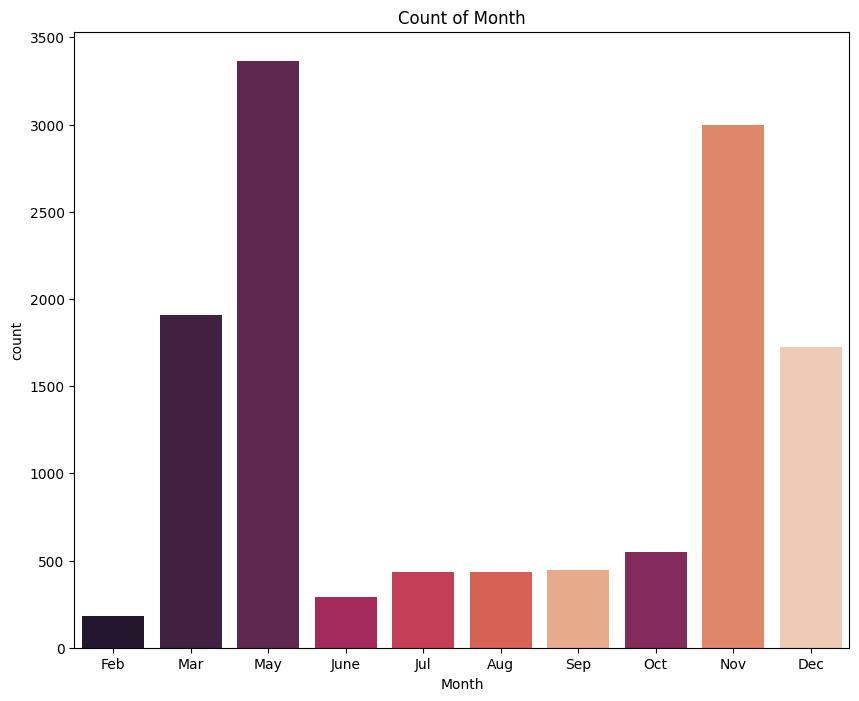

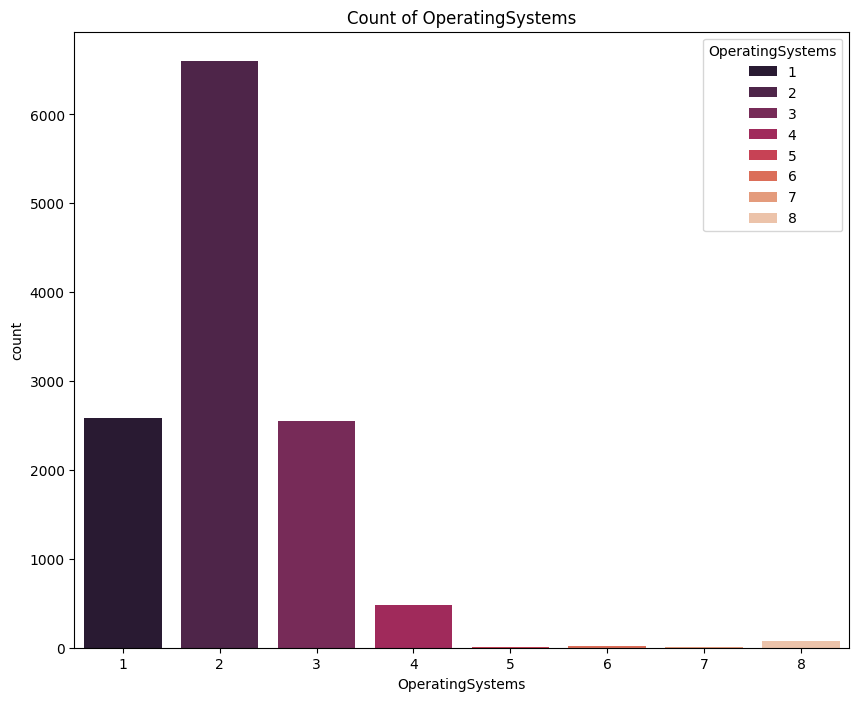

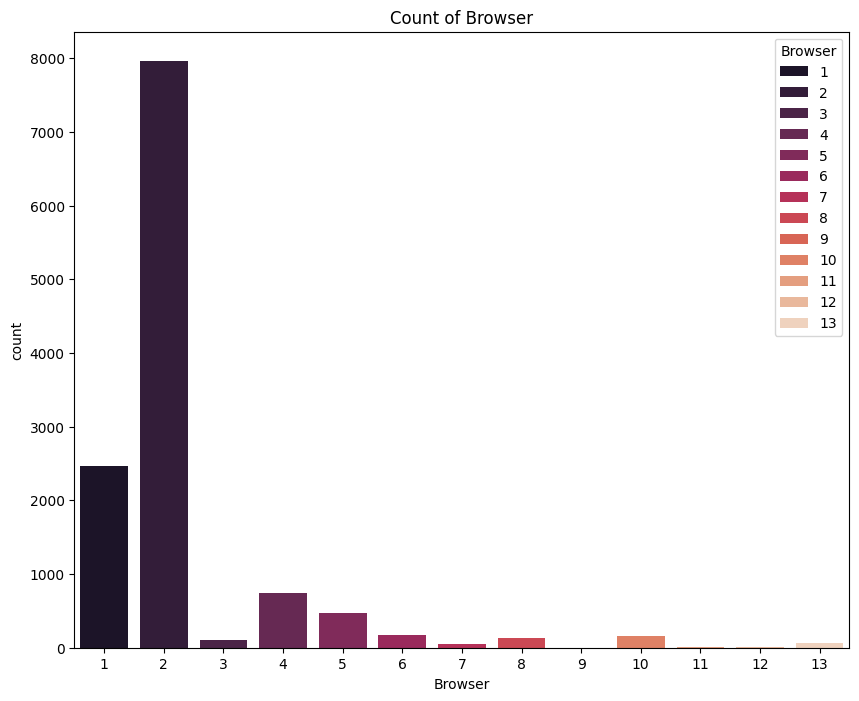

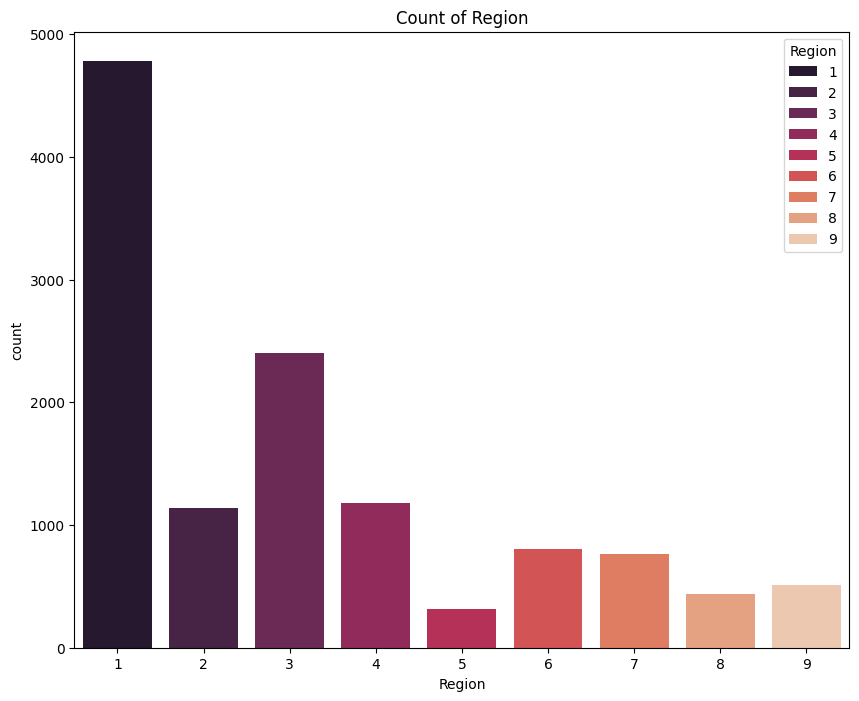

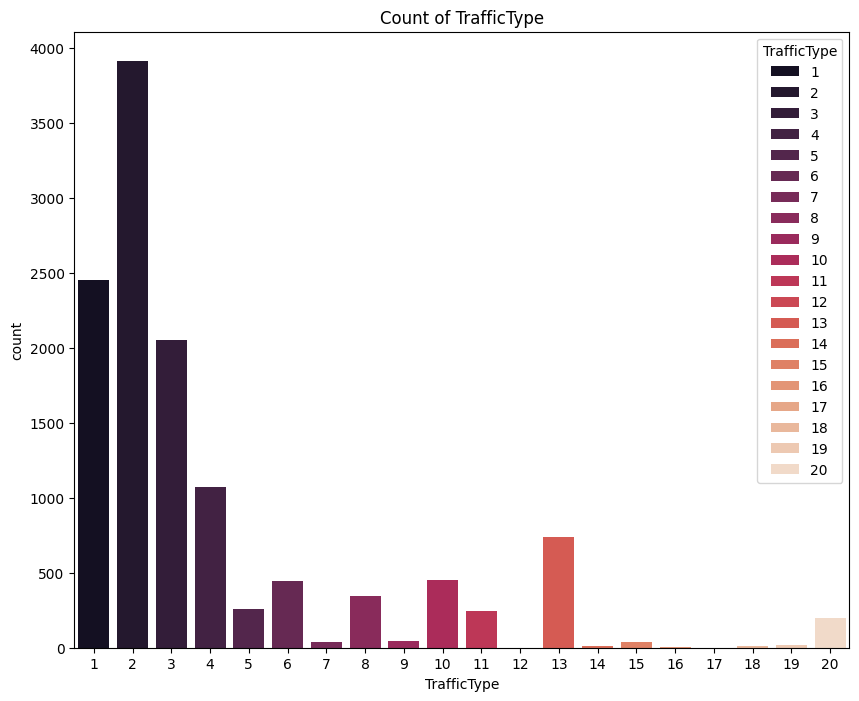

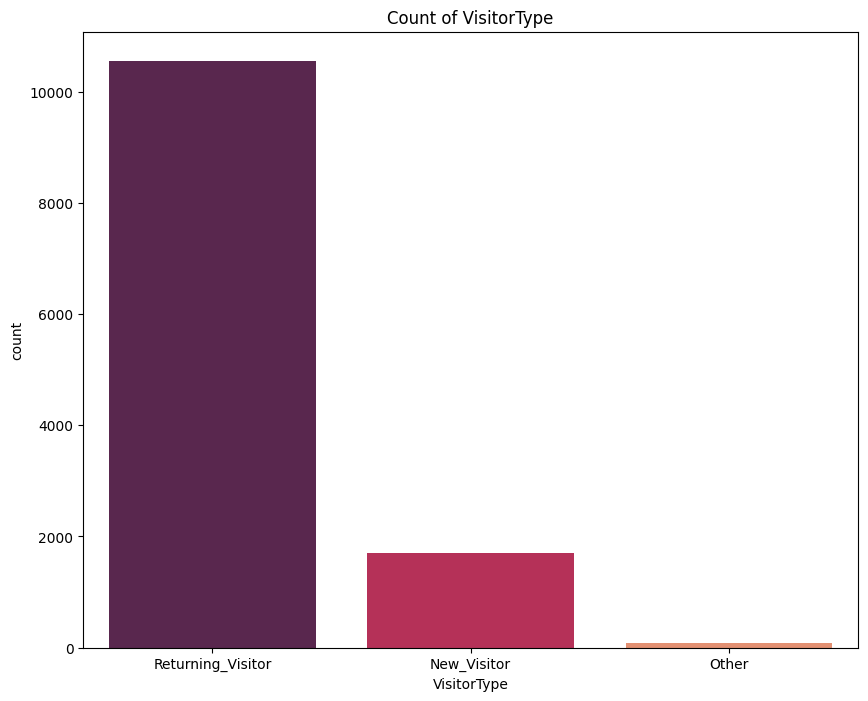

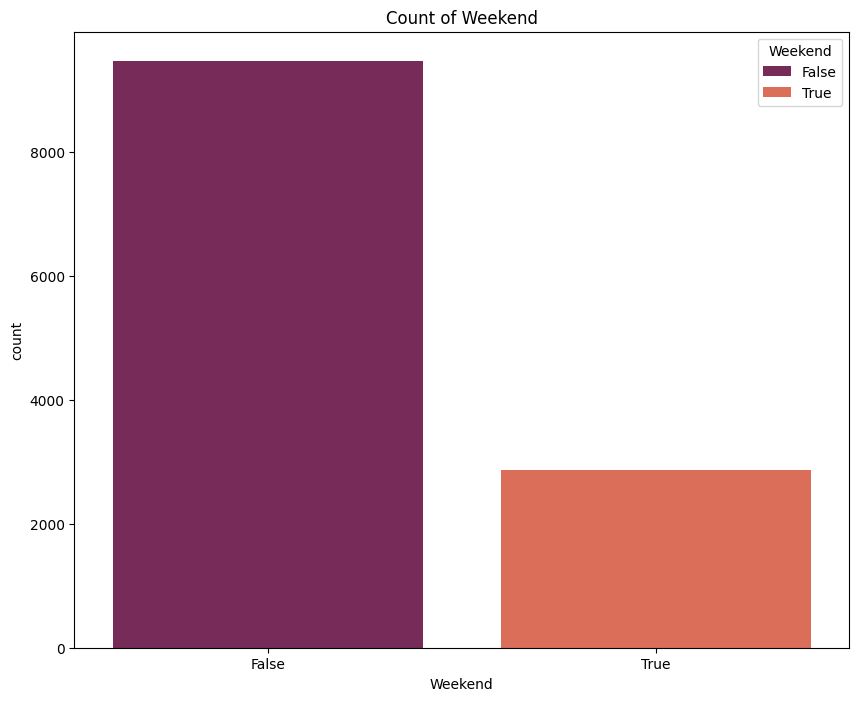

In [11]:
# We want the order of the months for month column to be correct so we define a list for the correct order
# Note: We exclude January and April from the order since they don't have any data on those months
month_order = ["Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for col in cat_df.columns:
    plt.figure(figsize = (10, 8))
    if col == "Month":
        sns.countplot(x = cat_df[col], hue = cat_df[col], order = month_order, palette = "rocket")
    else:
        sns.countplot(x = cat_df[col], hue = cat_df[col], palette = "rocket")
    plt.title(f"Count of {col}")
    plt.show()    

##### Grouped Count Plots for each Categorical Variable against Target

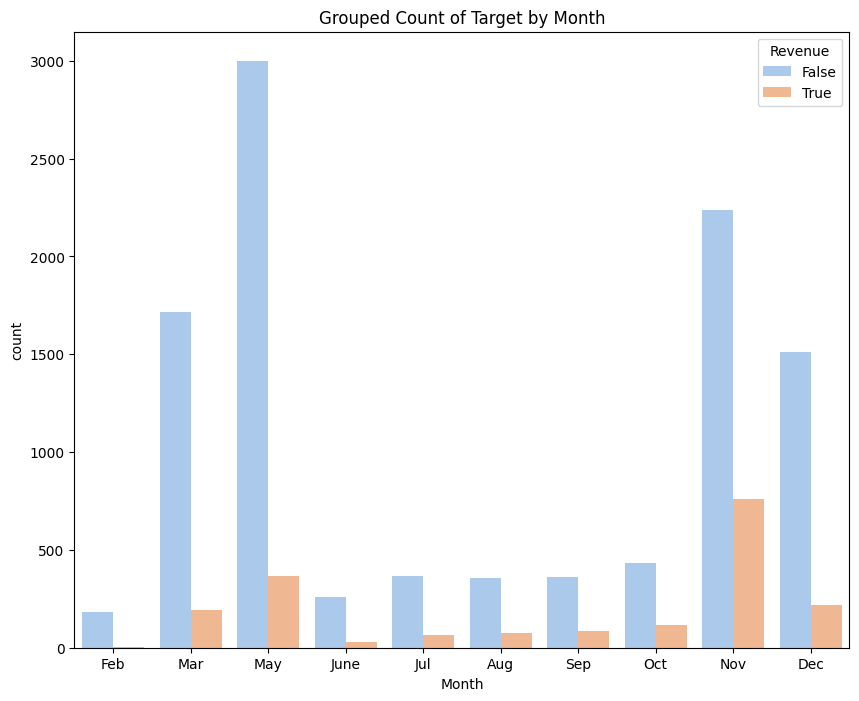

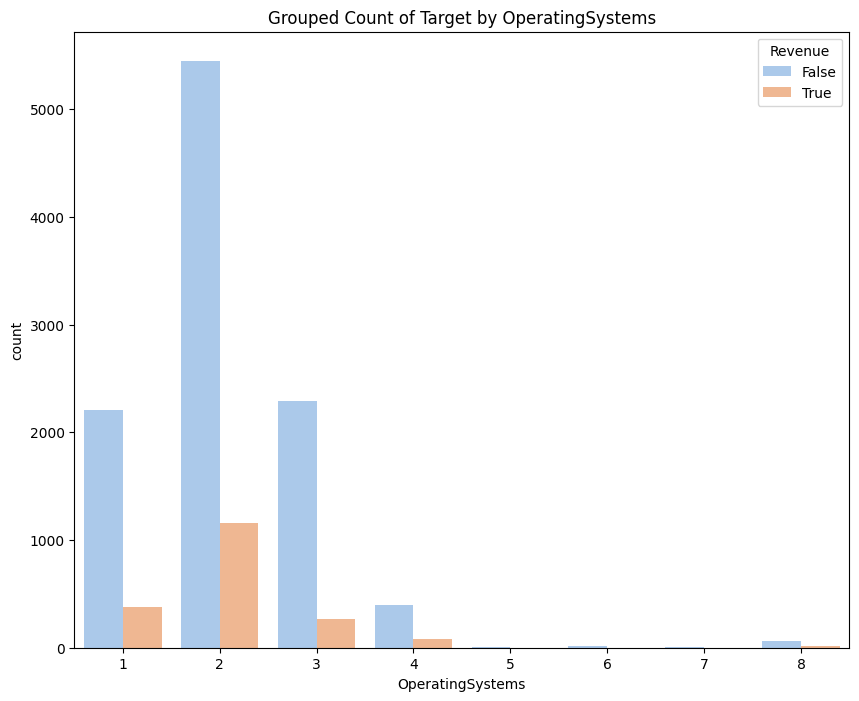

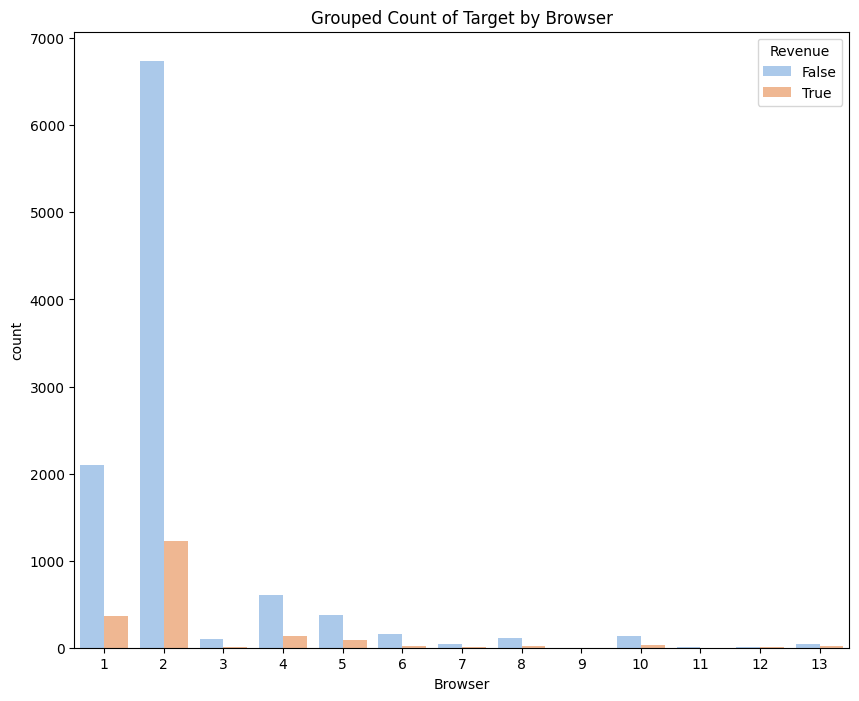

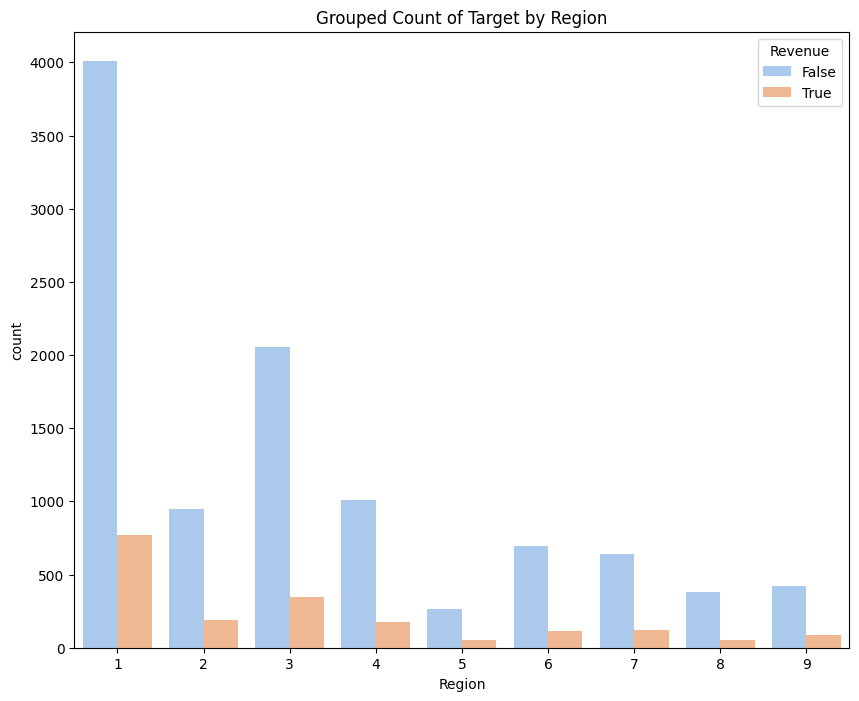

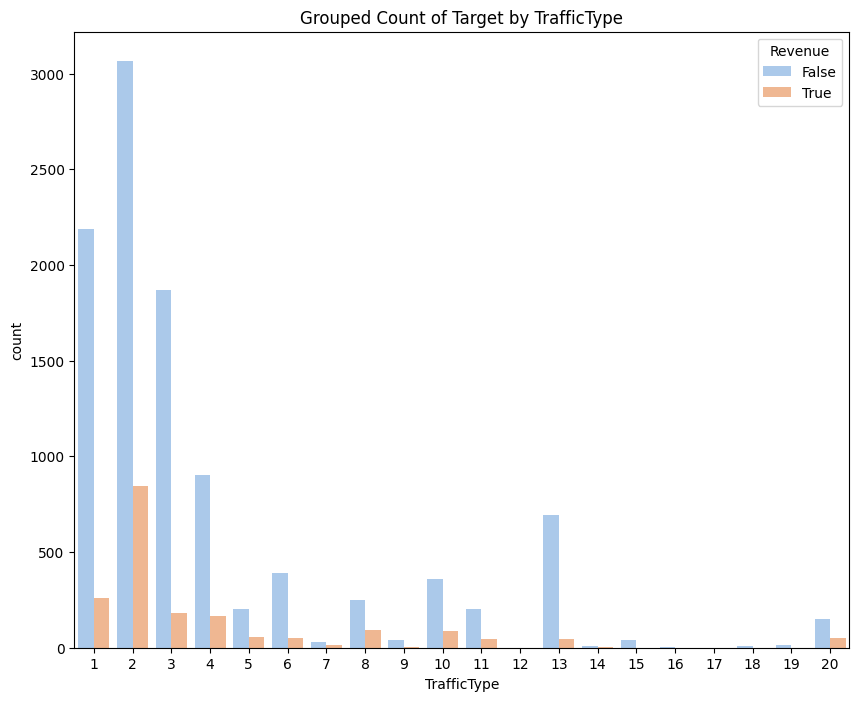

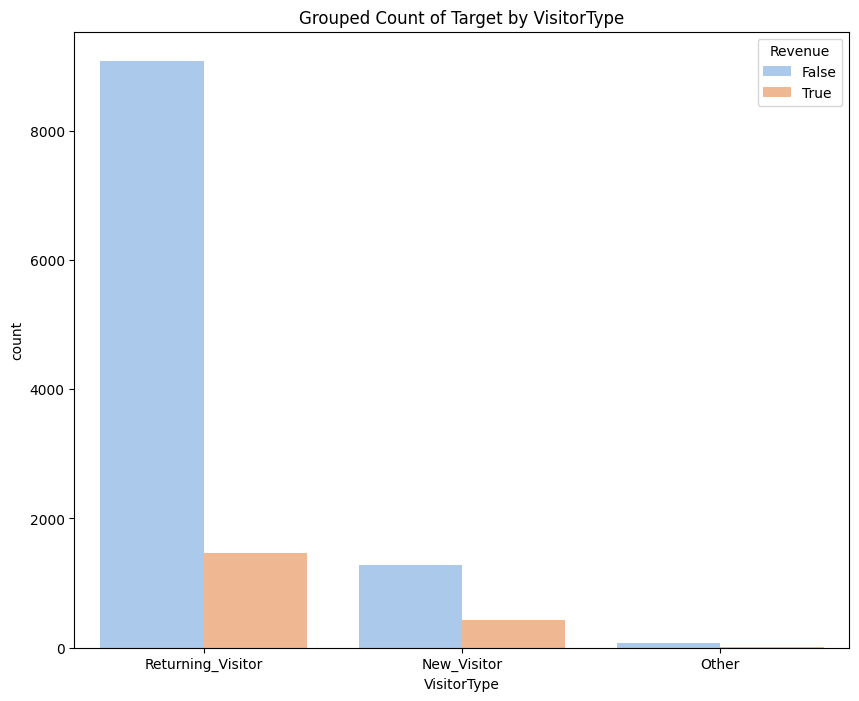

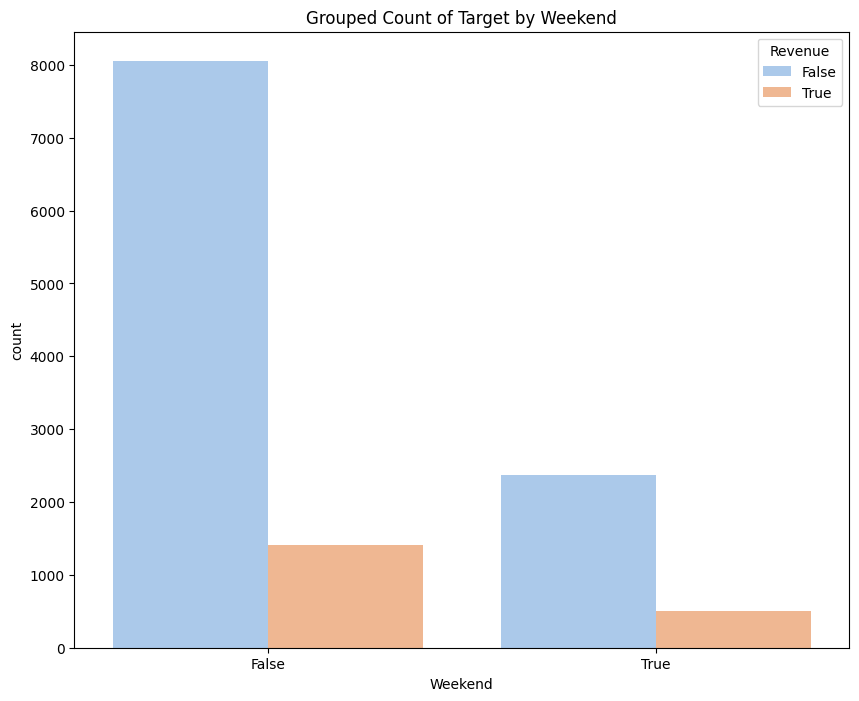

In [12]:
for col in cat_df.columns:
    plt.figure(figsize = (10, 8))
    if col == "Month":
        sns.countplot(x = cat_df[col], hue = raw_data["Revenue"], order = month_order, palette = "pastel")
    else:
        sns.countplot(x = cat_df[col], hue = raw_data["Revenue"], palette = "pastel")
    plt.title(f"Grouped Count of Target by {col}")
    plt.show()    

A correlation matrix of the nurmerical features:

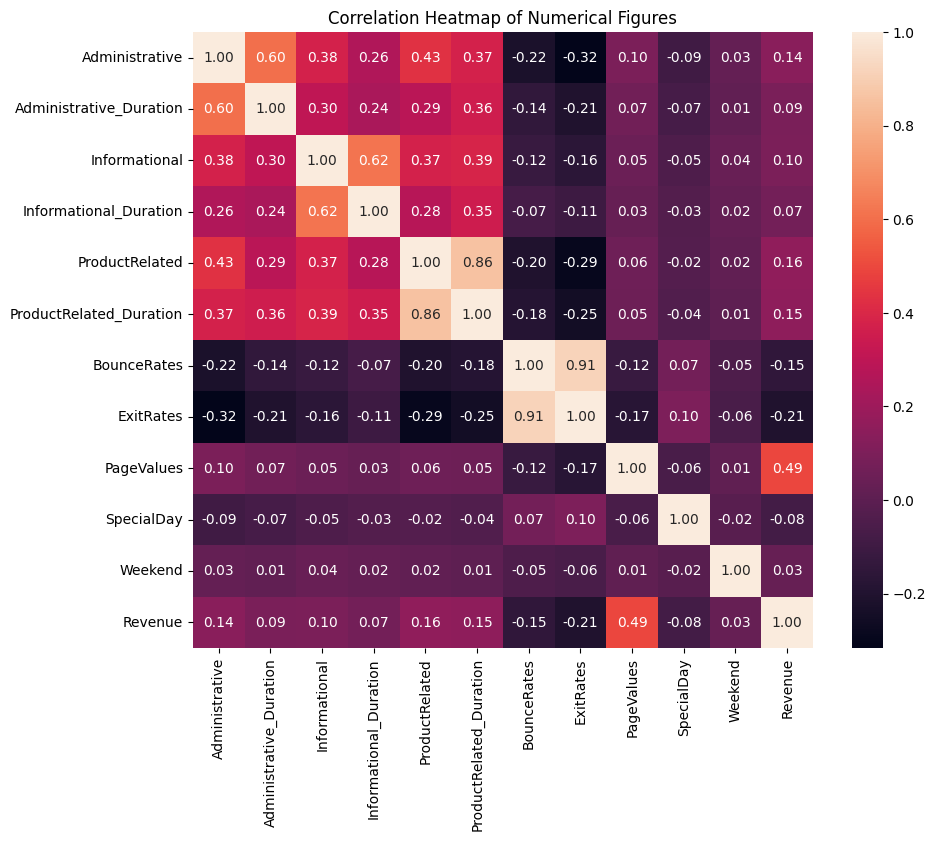

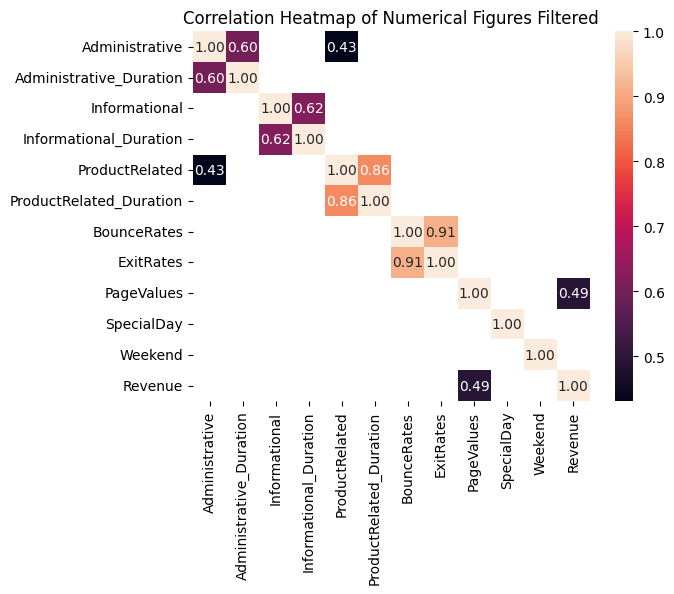

In [13]:
num_bool_data = raw_data.select_dtypes(include=["int64", "float64","bool"])
corr = num_bool_data.corr() #create the correlation matrix (using pearson)

plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot=True,cmap='rocket',fmt='.2f')
plt.title("Correlation Heatmap of Numerical Figures")
plt.show()

#mask of highly correlated
sns.heatmap(corr, annot=True,cmap='rocket',fmt='.2f',mask=corr.abs()<0.4)
plt.title("Correlation Heatmap of Numerical Figures Filtered")
plt.show()

`BounceRates` and `ExitRates` have extrodinarily high correlation, one will have to be removed when modeling.
`Administrative`, `Informational`, `ProductRelated` above 0.5 correlated with their respective durations which is expected. 

We can use PCA to determine which ones to keep or possibly combine later on. Maybe combine bounce and exit rates to create a 'leaving' rate? If we add all the durations would it make the total duration of the visit?

Page Value is also the only value that has mild correlation with our target.

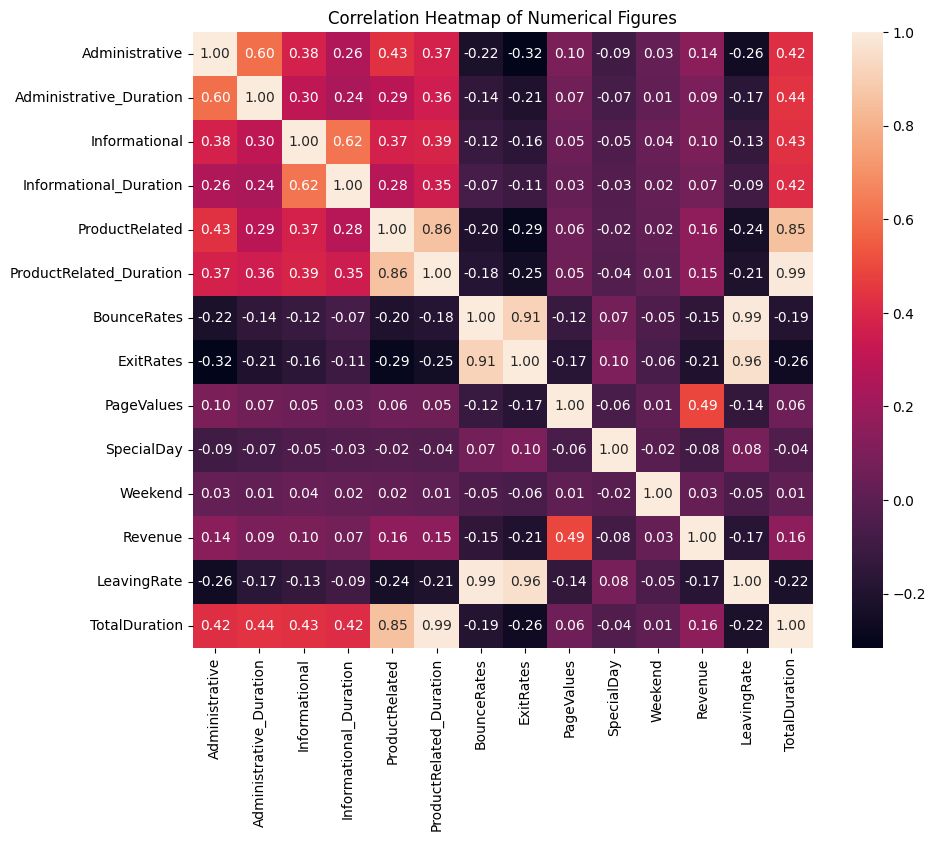

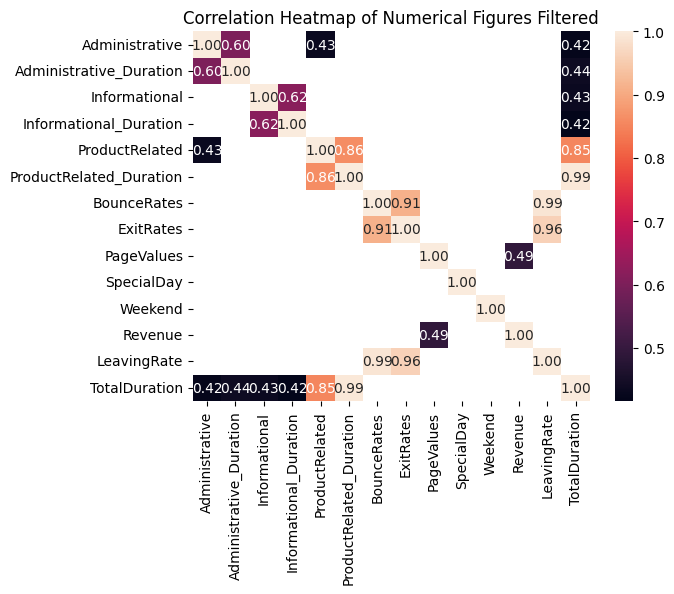

In [14]:

num_bool_data['LeavingRate']=(num_bool_data['BounceRates']+num_bool_data['ExitRates']/2)
num_bool_data['TotalDuration'] = num_bool_data['Administrative_Duration']+num_bool_data['Informational_Duration']+num_bool_data['ProductRelated_Duration']

corrExpl = num_bool_data.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corrExpl, annot=True,cmap='rocket',fmt='.2f')
plt.title("Correlation Heatmap of Numerical Figures")
plt.show()

#mask of highly correlated
sns.heatmap(corrExpl, annot=True,cmap='rocket',fmt='.2f',mask=corrExpl.abs()<0.4)
plt.title("Correlation Heatmap of Numerical Figures Filtered")
plt.show()

The new features failed to reveal any additional correlation outside of the expected correlations from the original values. We can choose to keep these created features or just drop one of the correllated.

Notably weekend and special day have no strong correlations with anything, including our target.

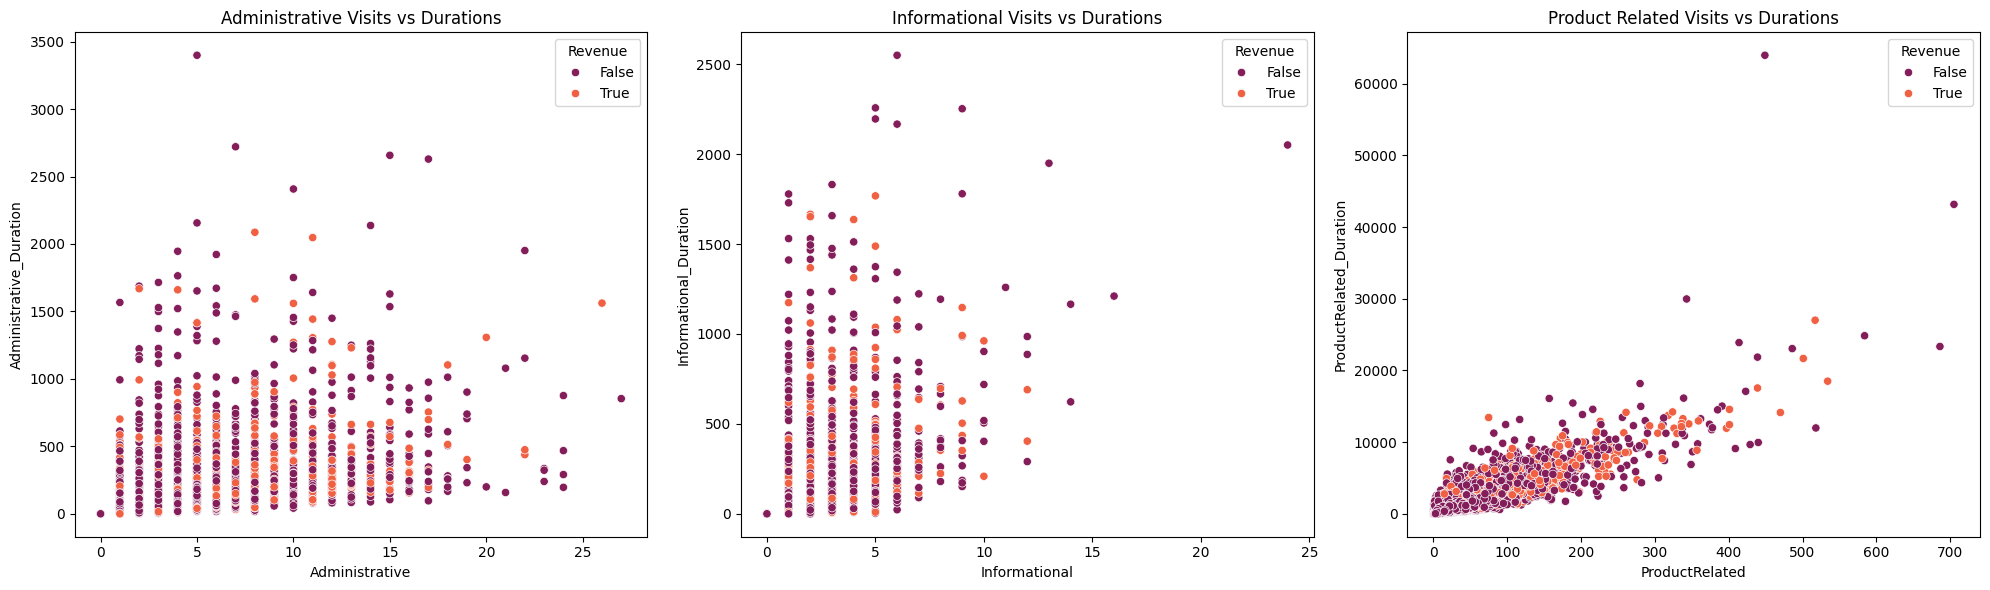

In [15]:
plt.figure(figsize = (20,6)) # Make larger or smaller as needed
#Admin Plot
plt.subplot(1,3,1) 
sns.scatterplot(num_bool_data,x='Administrative',y='Administrative_Duration', hue='Revenue',palette='rocket')
plt.title(f"Administrative Visits vs Durations")

#Informational Plot
plt.subplot(1,3,2) 
sns.scatterplot(num_bool_data,x='Informational',y='Informational_Duration', hue='Revenue',palette='rocket')
plt.title(f"Informational Visits vs Durations")

#ProductRelated Plot
plt.subplot(1,3,3) 
sns.scatterplot(num_bool_data,x='ProductRelated',y='ProductRelated_Duration', hue='Revenue',palette='rocket')
plt.title(f"Product Related Visits vs Durations")

plt.tight_layout()
plt.show()

Both Administrative and Informational appear to have a weak and noisy upward trend with page visits and duration (as expected) but Product Related revealed a nearly linear relationship with it's durration. Interestingly this also revealed that the high duration outliers typically resulted in a failed purchase.

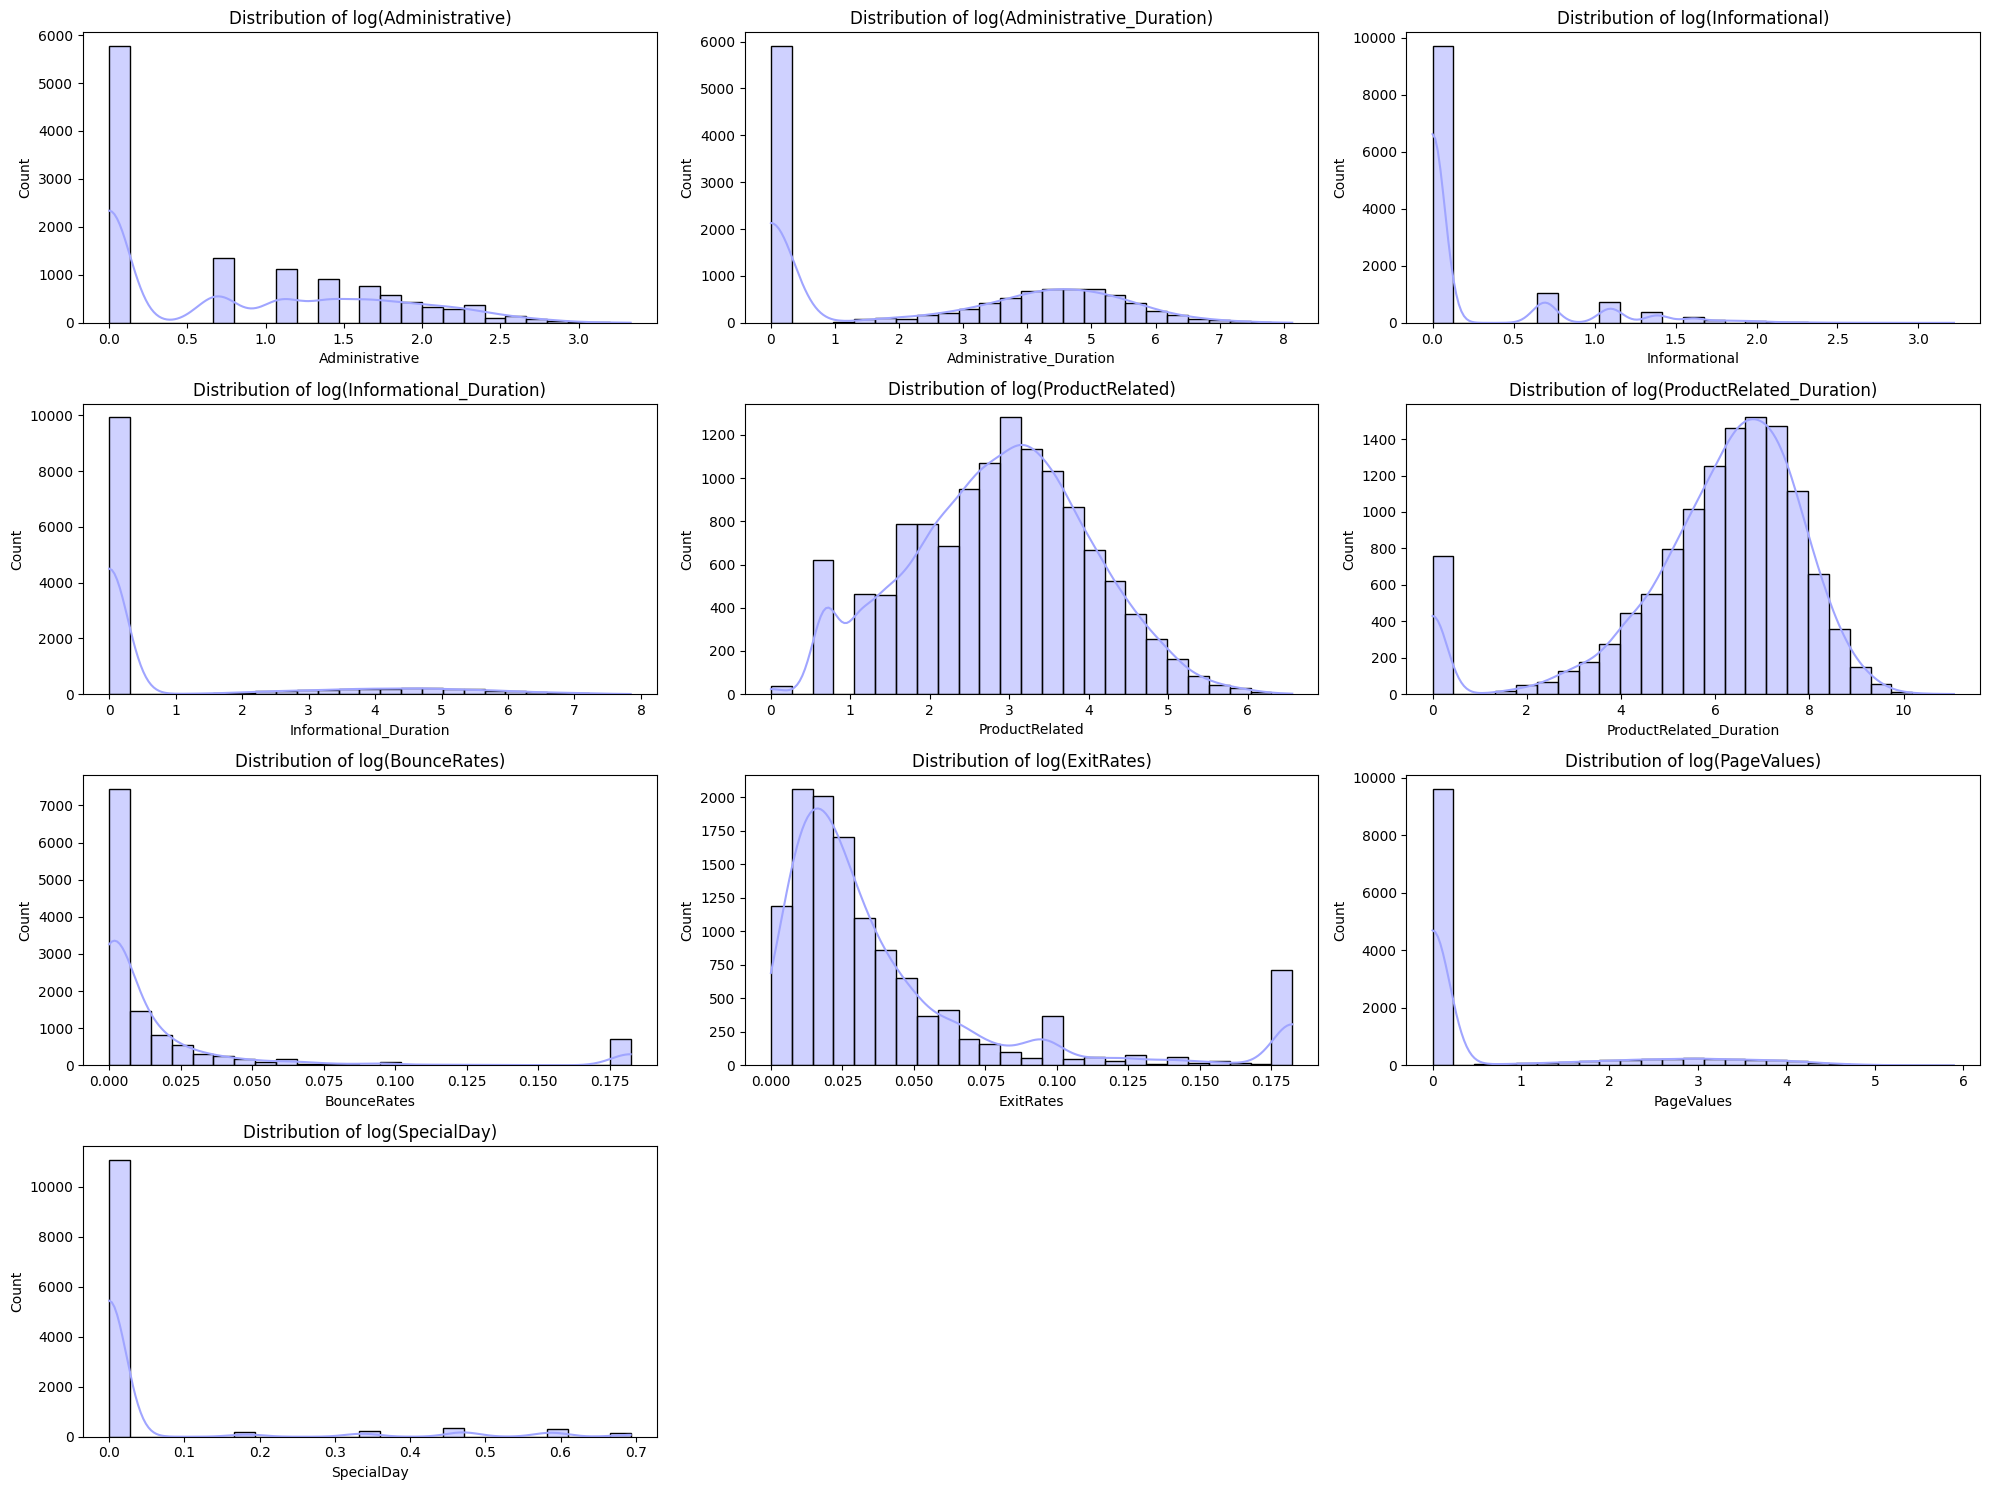

In [16]:
#Log Transformations of all the numeric values (?) try and improve skew
plt.figure(figsize = (20, 15)) # Make larger or smaller as needed
log_num_df = num_df
for i, col in enumerate(log_num_df.columns, 1):
    log_num_df[col] = np.log1p(log_num_df[col]) #applies a log (x+1) transformation
    plt.subplot(4,3,i) # Subplot (nrows, ncols, location in matrix)
    sns.histplot(log_num_df[col], kde = True, bins = 25, color = "#A0A5FF")
    plt.title(f"Distribution of log({col})")
plt.tight_layout()
plt.show()


Applying a log(x+1) transformation has assisted in minimizing some of the skew in a few of the features, but the smaller rate features / sparse features had little to know change.